In [1]:
import numpy as np
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
df=pd.read_csv('House Price Prediction Challenge.csv')
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


# Data Inspection and Pre-processing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [4]:
df['ADDRESS'].value_counts()

Zirakpur,Chandigarh                   509
Whitefield,Bangalore                  230
Raj Nagar Extension,Ghaziabad         215
Sector-137 Noida,Noida                139
New Town,Kolkata                      131
                                     ... 
Ambika Township,Jivarajpark,Rajkot      1
Cheranalloor,Kochi                      1
Baba Nagar,Bangalore                    1
Barra Devi Naubasta road,Kanpur         1
E3-108, Lake View Recidency,,Vapi       1
Name: ADDRESS, Length: 6899, dtype: int64

We will extract city from address and stored in new column in city

In [5]:
# Function to extract the city
def extract_city(location):
    return location.split(',')[-1].strip()

# Apply the function to extract the city and store it in a new column
df['CITY'] = df['ADDRESS'].apply(extract_city)

df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0,Agra
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0,Vapi
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,Jaipur
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,Chennai


In [6]:
df['CITY'].unique()

array(['Bangalore', 'Mysore', 'Ghaziabad', 'Kolkata', 'Kochi', 'Jaipur',
       'Mohali', 'Chennai', 'Siliguri', 'Noida', 'Raigad', 'Bhubaneswar',
       'Wardha', 'Pune', 'Mumbai', 'Nagpur', 'Deoghar', 'Bhiwadi',
       'Faridabad', 'Lalitpur', 'Maharashtra', 'Vadodara',
       'Visakhapatnam', 'Vapi', 'Mangalore', 'Aurangabad', 'Ottapalam',
       'Vijayawada', 'Belgaum', 'Bhopal', 'Lucknow', 'Kanpur',
       'Gandhinagar', 'Pondicherry', 'Agra', 'Ranchi', 'Gurgaon', 'Udupi',
       'Indore', 'Jodhpur', 'Coimbatore', 'Valsad', 'Palghar', 'Surat',
       'Varanasi', 'Guwahati', 'Amravati', 'Anand', 'Tirupati',
       'Secunderabad', 'Raipur', 'Vizianagaram', 'Thrissur', 'Satna',
       'Madurai', 'Chandigarh', 'Shimla', 'Gwalior', 'Rajkot', 'Sonipat',
       'Allahabad', 'Berhampur', 'Roorkee', 'Dharuhera', 'Latur',
       'Durgapur', 'Panchkula', 'Solapur', 'Durg', 'Goa', 'Jamshedpur',
       'Hazaribagh', 'Jabalpur', 'Hosur', 'Morbi', 'Hubli', 'Karnal',
       'Patna', 'Bilaspur', '

In [7]:
df['CITY'].value_counts()

Bangalore      4340
Lalitpur       2993
Mumbai         2023
Pune           1991
Noida          1767
               ... 
Bhadrak           1
Kurukshetra       1
Dibrugarh         1
Sagar             1
Washim            1
Name: CITY, Length: 256, dtype: int64

In [8]:
df.drop("ADDRESS",axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   LONGITUDE              29451 non-null  float64
 9   LATITUDE               29451 non-null  float64
 10  TARGET(PRICE_IN_LACS)  29451 non-null  float64
 11  CITY                   29451 non-null  object 
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [10]:
df.isnull().mean()

POSTED_BY                0.0
UNDER_CONSTRUCTION       0.0
RERA                     0.0
BHK_NO.                  0.0
BHK_OR_RK                0.0
SQUARE_FT                0.0
READY_TO_MOVE            0.0
RESALE                   0.0
LONGITUDE                0.0
LATITUDE                 0.0
TARGET(PRICE_IN_LACS)    0.0
CITY                     0.0
dtype: float64

In [11]:
df.duplicated().sum()

432

In [12]:
a=df[df.duplicated()]
a

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
1904,Dealer,1,0,3,BHK,1209.628644,0,1,22.541110,88.337780,100.0,Kolkata
2351,Dealer,0,0,2,BHK,896.680112,1,1,30.662283,76.822397,28.9,Chandigarh
2611,Dealer,0,0,3,BHK,1350.256549,1,1,28.380160,77.369936,50.0,Faridabad
2618,Dealer,1,0,2,BHK,800.000000,0,1,12.800090,77.711820,27.0,Bangalore
3211,Owner,0,0,2,BHK,712.105799,1,1,22.506860,88.223965,35.0,Kolkata
...,...,...,...,...,...,...,...,...,...,...,...,...
29321,Dealer,0,1,1,BHK,649.641577,1,1,30.662283,76.822397,14.5,Chandigarh
29345,Dealer,1,1,3,BHK,1563.155686,0,1,30.684523,76.691728,74.5,Mohali
29357,Owner,0,1,3,BHK,1446.201311,1,1,28.596320,77.381430,75.0,Noida
29389,Builder,1,0,3,BHK,979.290979,0,0,22.747639,88.600902,27.9,Kolkata


We will drop duplicates rows from dataframe

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29019 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29019 non-null  object 
 1   UNDER_CONSTRUCTION     29019 non-null  int64  
 2   RERA                   29019 non-null  int64  
 3   BHK_NO.                29019 non-null  int64  
 4   BHK_OR_RK              29019 non-null  object 
 5   SQUARE_FT              29019 non-null  float64
 6   READY_TO_MOVE          29019 non-null  int64  
 7   RESALE                 29019 non-null  int64  
 8   LONGITUDE              29019 non-null  float64
 9   LATITUDE               29019 non-null  float64
 10  TARGET(PRICE_IN_LACS)  29019 non-null  float64
 11  CITY                   29019 non-null  object 
dtypes: float64(4), int64(5), object(3)
memory usage: 2.9+ MB


In [15]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29019.000000,29019.000000,29019.000000,2.901900e+04,29019.000000,29019.000000,29019.000000,29019.000000,29019.000000
mean,0.179021,0.316172,2.390985,2.005180e+04,0.820979,0.930287,21.271150,76.828736,141.784157
std,0.383376,0.464989,0.880907,1.915434e+06,0.383376,0.254667,6.196293,10.572842,650.397852
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000000e+02,1.000000,1.000000,18.452663,73.794800,38.000000
50%,0.000000,0.000000,2.000000,1.172969e+03,1.000000,1.000000,20.631532,77.322604,61.700000
75%,0.000000,1.000000,3.000000,1.550200e+03,1.000000,1.000000,26.888396,77.882363,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


# EDA

In [16]:
# Find categorical variables
categorical_variables = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical_variables)))
print(categorical_variables)

There are 3 categorical variables
['POSTED_BY', 'BHK_OR_RK', 'CITY']


In [17]:
# Finding numerical variables
numerical_variables=[var for var in df.columns if var not in categorical_variables]
print('There are {} numerical variables'.format(len(numerical_variables)))
print(numerical_variables)

There are 9 numerical variables
['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)']


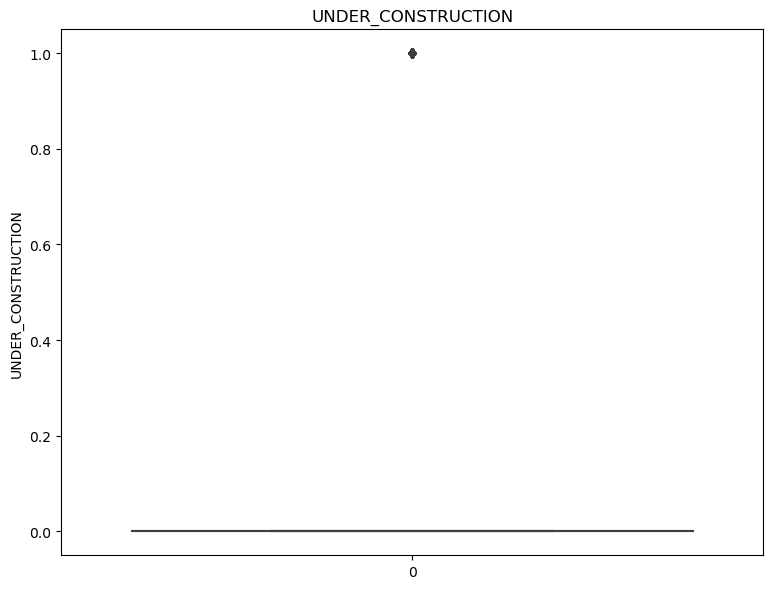

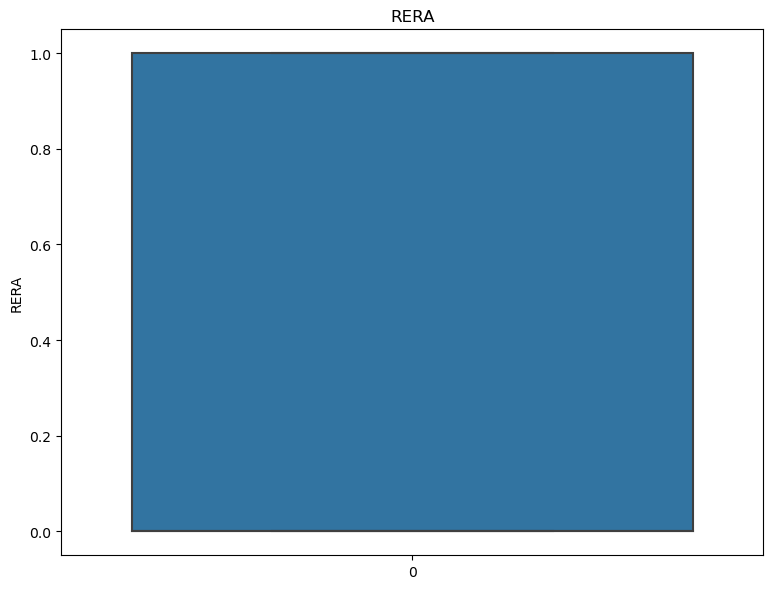

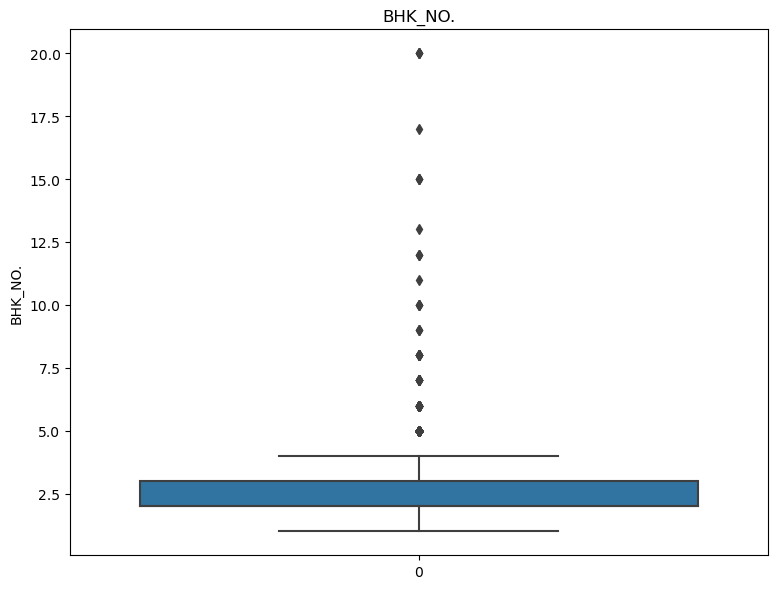

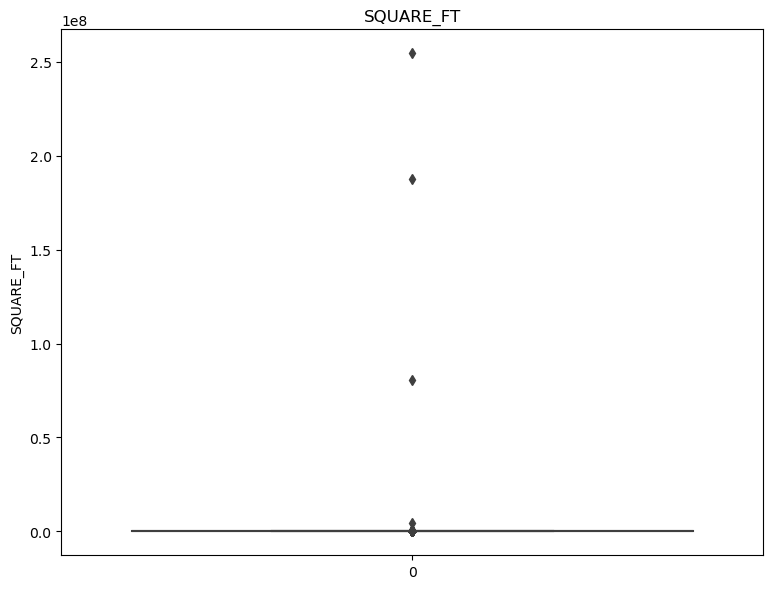

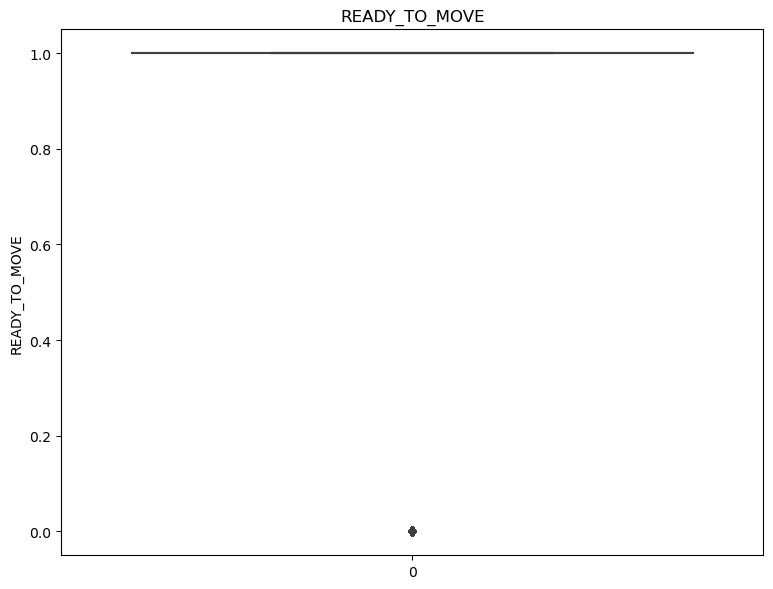

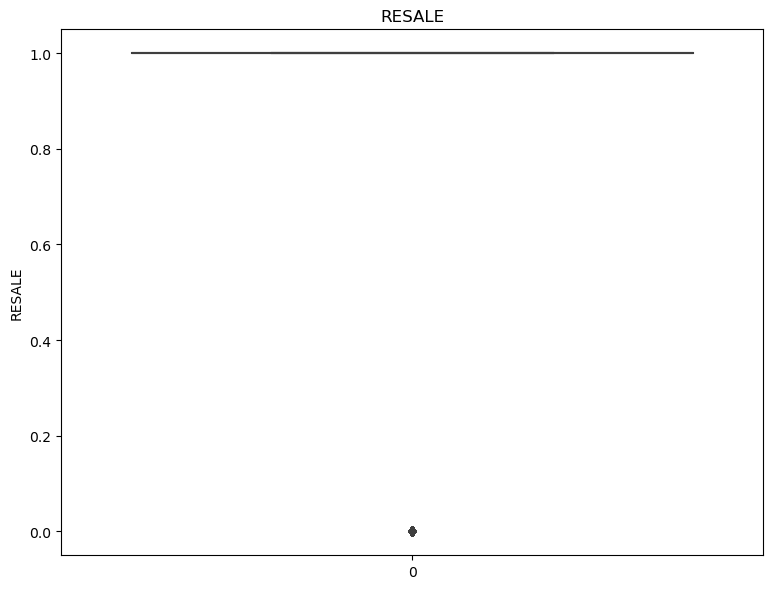

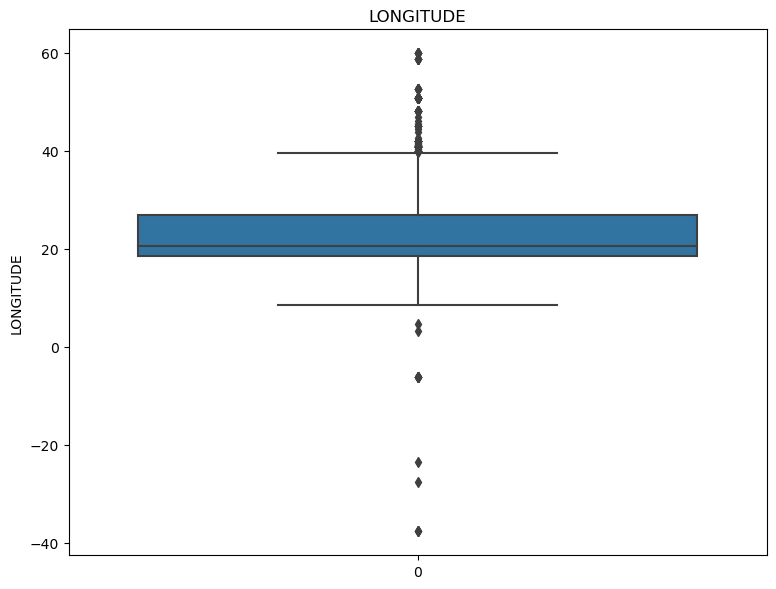

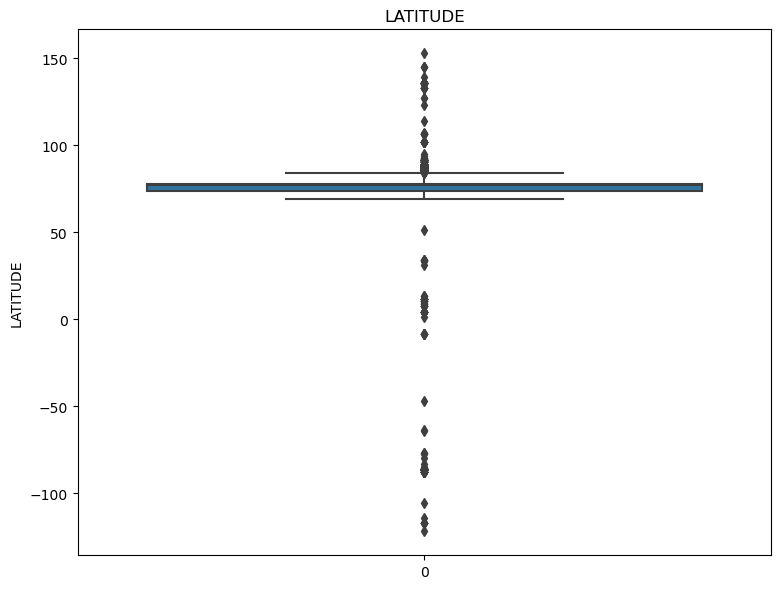

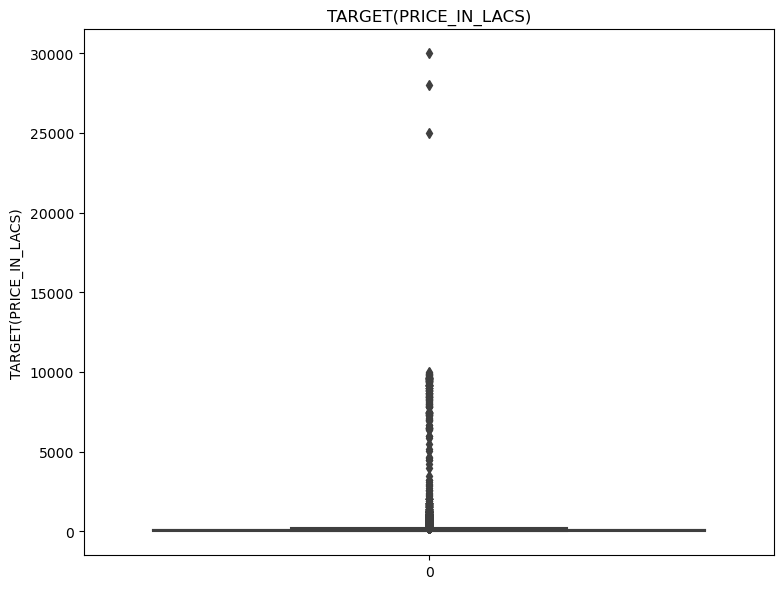

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting Box and Distribution plot 
for var in numerical_variables:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)
    plt.tight_layout()
    plt.show()

In [19]:
df[df['BHK_NO.'] > 7][['BHK_NO.','TARGET(PRICE_IN_LACS)','CITY']]

,BHK_NO.,TARGET(PRICE_IN_LACS),CITY
2215,12,200.00,Coimbatore
2768,8,170.00,Bangalore
3466,20,15.20,Ratnagiri
3882,10,0.85,Hosur
5471,8,2000.00,Lalitpur
6963,9,180.00,Bangalore
7644,8,400.00,Pune
8872,13,500.00,Bangalore
9504,8,2000.00,Mumbai
10780,8,320.00,Vidisha


In [18]:
condition = df['TARGET(PRICE_IN_LACS)'] >= 5 * df['BHK_NO.']

# Filter the DataFrame
df = df[condition]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28973 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              28973 non-null  object 
 1   UNDER_CONSTRUCTION     28973 non-null  int64  
 2   RERA                   28973 non-null  int64  
 3   BHK_NO.                28973 non-null  int64  
 4   BHK_OR_RK              28973 non-null  object 
 5   SQUARE_FT              28973 non-null  float64
 6   READY_TO_MOVE          28973 non-null  int64  
 7   RESALE                 28973 non-null  int64  
 8   LONGITUDE              28973 non-null  float64
 9   LATITUDE               28973 non-null  float64
 10  TARGET(PRICE_IN_LACS)  28973 non-null  float64
 11  CITY                   28973 non-null  object 
dtypes: float64(4), int64(5), object(3)
memory usage: 2.9+ MB


In [20]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5,Kolkata
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,27.140626,78.043277,45.0,Agra
29447,Owner,0,0,2,BHK,769.230769,1,1,39.945409,-86.150721,16.0,Vapi
29448,Dealer,0,0,2,BHK,1022.641509,1,1,26.928785,75.828002,27.1,Jaipur
29449,Owner,0,0,2,BHK,927.079009,1,1,12.900150,80.227910,67.0,Chennai


C:\Users\prasa\AppData\Local\Temp\ipykernel_19804\1031930469.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var])


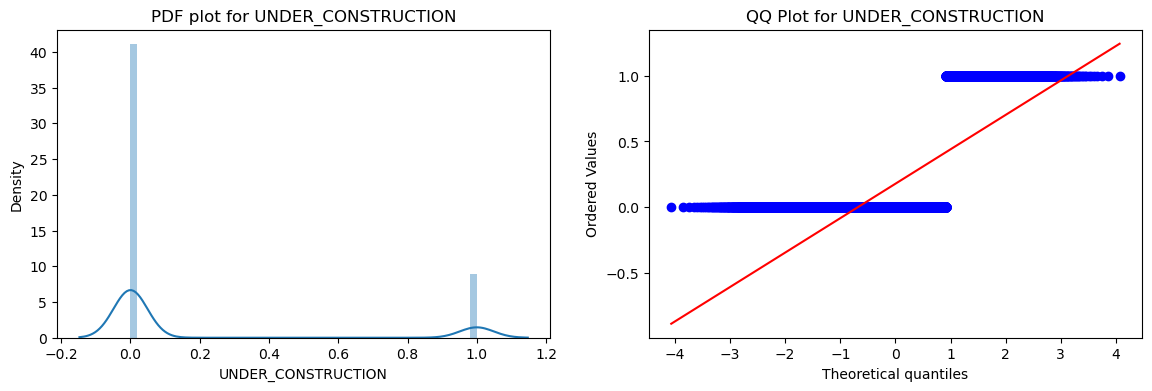

C:\Users\prasa\AppData\Local\Temp\ipykernel_19804\1031930469.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var])


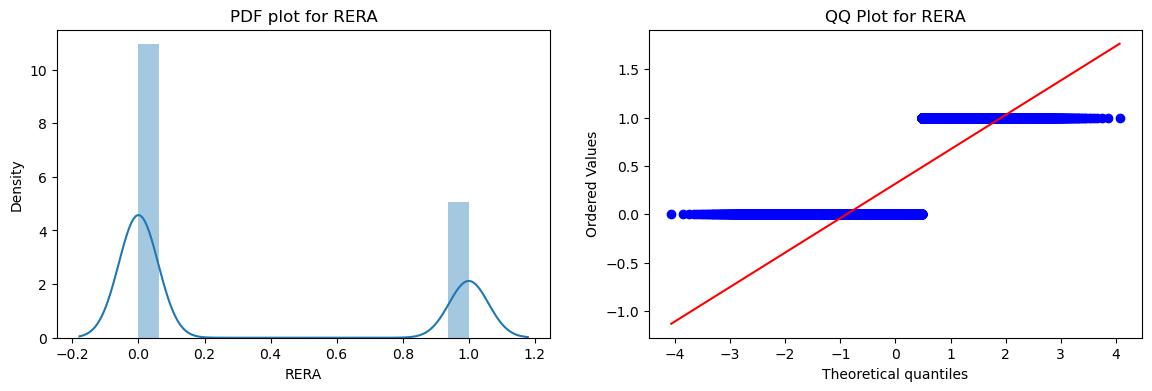

C:\Users\prasa\AppData\Local\Temp\ipykernel_19804\1031930469.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var])


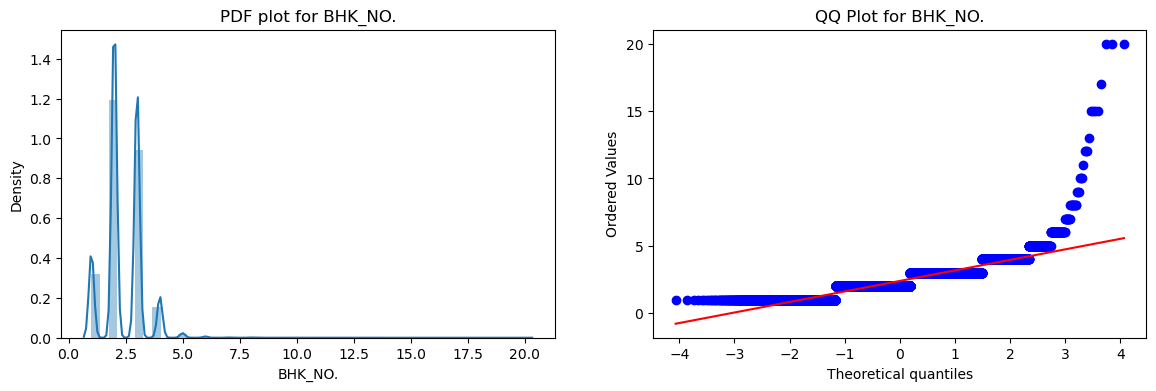

C:\Users\prasa\AppData\Local\Temp\ipykernel_19804\1031930469.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var])


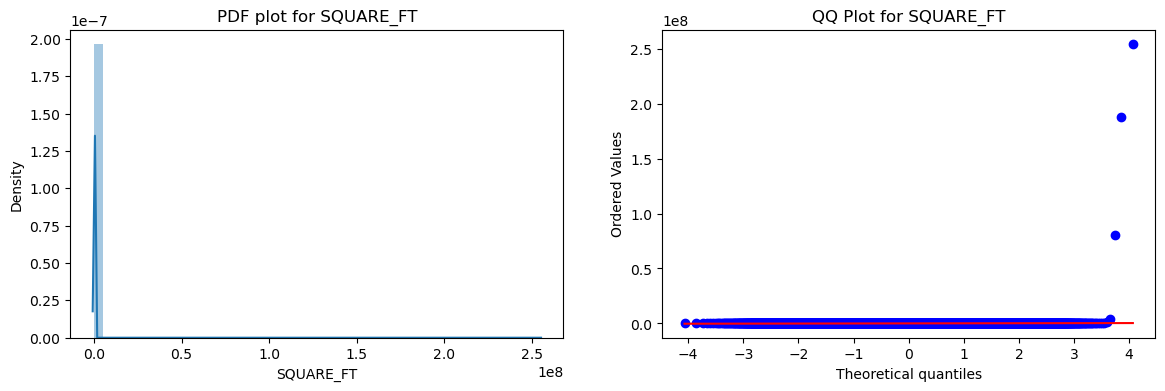

C:\Users\prasa\AppData\Local\Temp\ipykernel_19804\1031930469.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var])


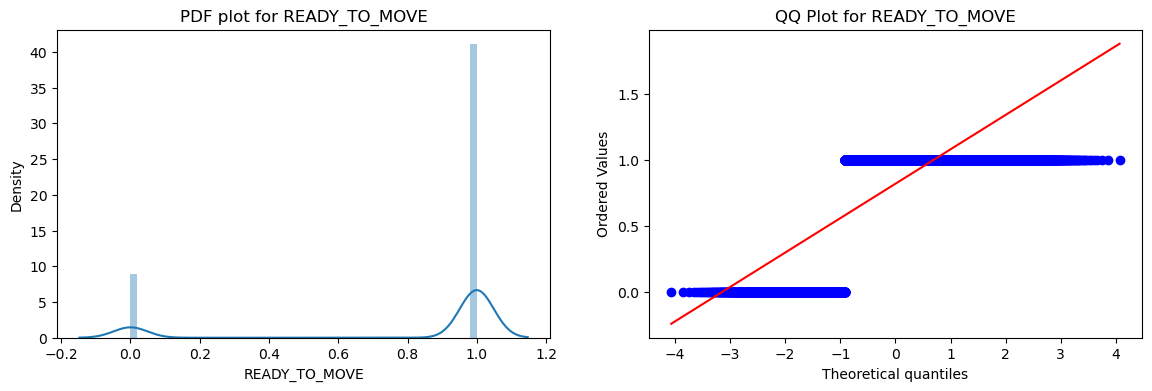

C:\Users\prasa\AppData\Local\Temp\ipykernel_19804\1031930469.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var])


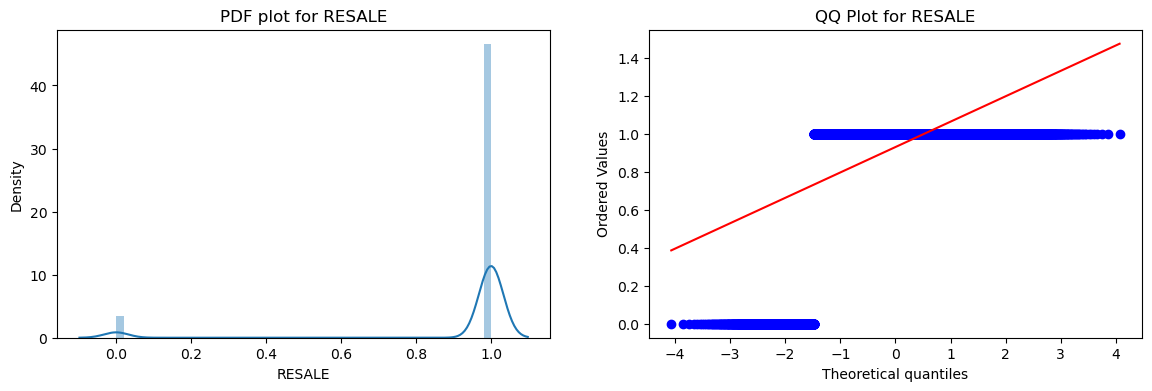

C:\Users\prasa\AppData\Local\Temp\ipykernel_19804\1031930469.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var])


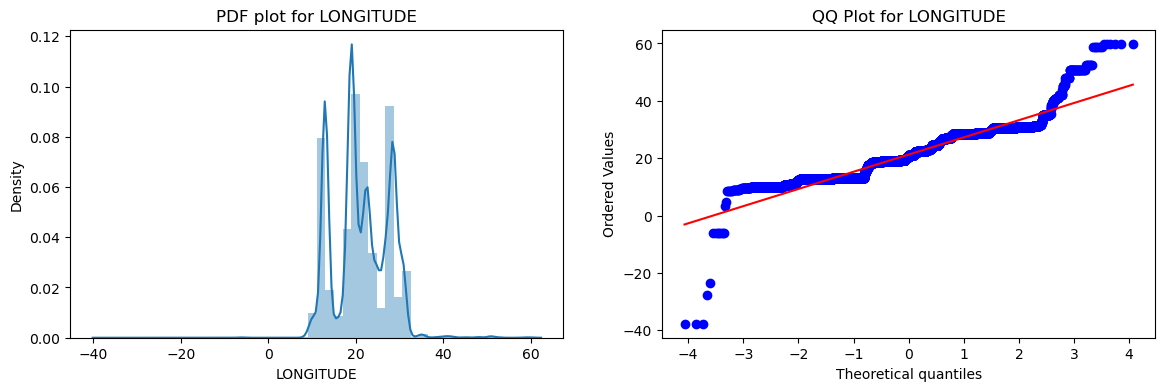

C:\Users\prasa\AppData\Local\Temp\ipykernel_19804\1031930469.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var])


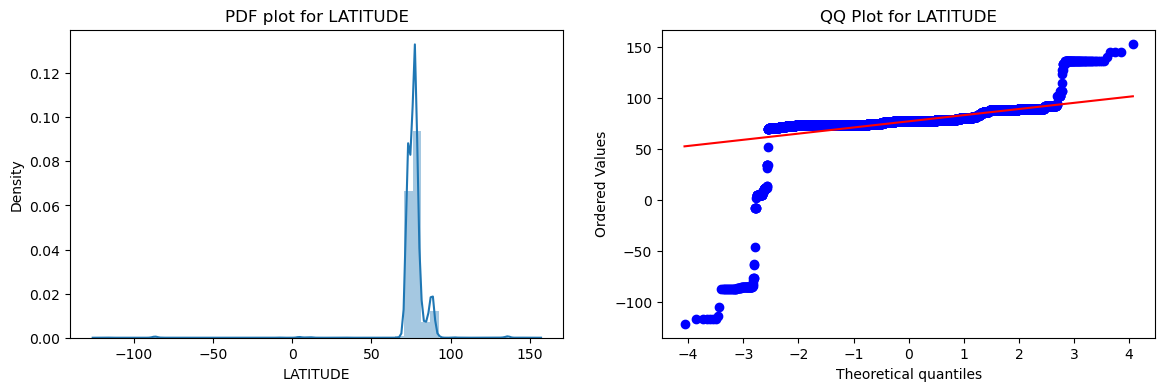

C:\Users\prasa\AppData\Local\Temp\ipykernel_19804\1031930469.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var])


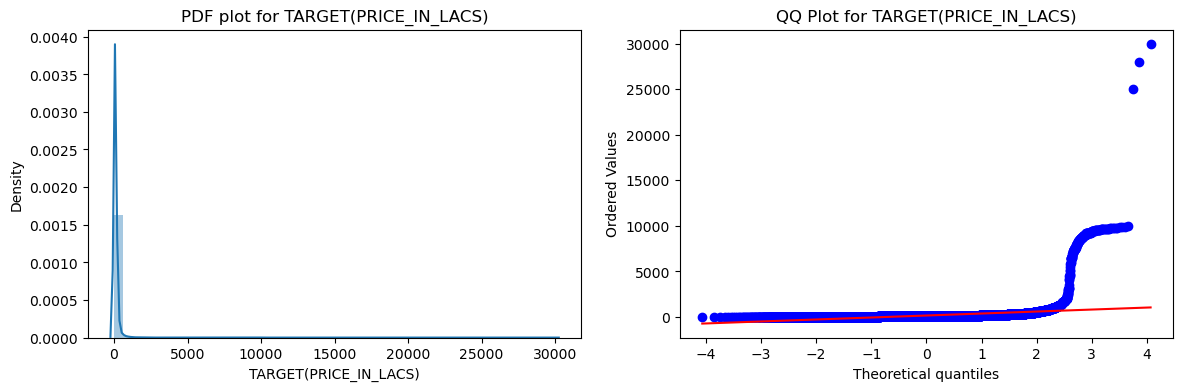

In [23]:
from scipy import stats

for var in numerical_variables:
    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    sns.distplot(df[var])
    plt.title(f'PDF plot for {var}')

    plt.subplot(122)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.title(f'QQ Plot for {var}')

    plt.show()

In [24]:
# Excluding variables with more than 5 unique values
excluded_variables = [var for var in df.columns if len(df[var].value_counts()) > 5]

# Including variables that are not in the excluded list
target_variables = [var for var in df.columns if var not in excluded_variables]

# Defining r to autofit the number and size of plots with 2 columns
r = int(len(target_variables) / 2 + 1)

In [25]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
    '''Takes axes as input and labels the percent count of each bar in a countplot'''
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

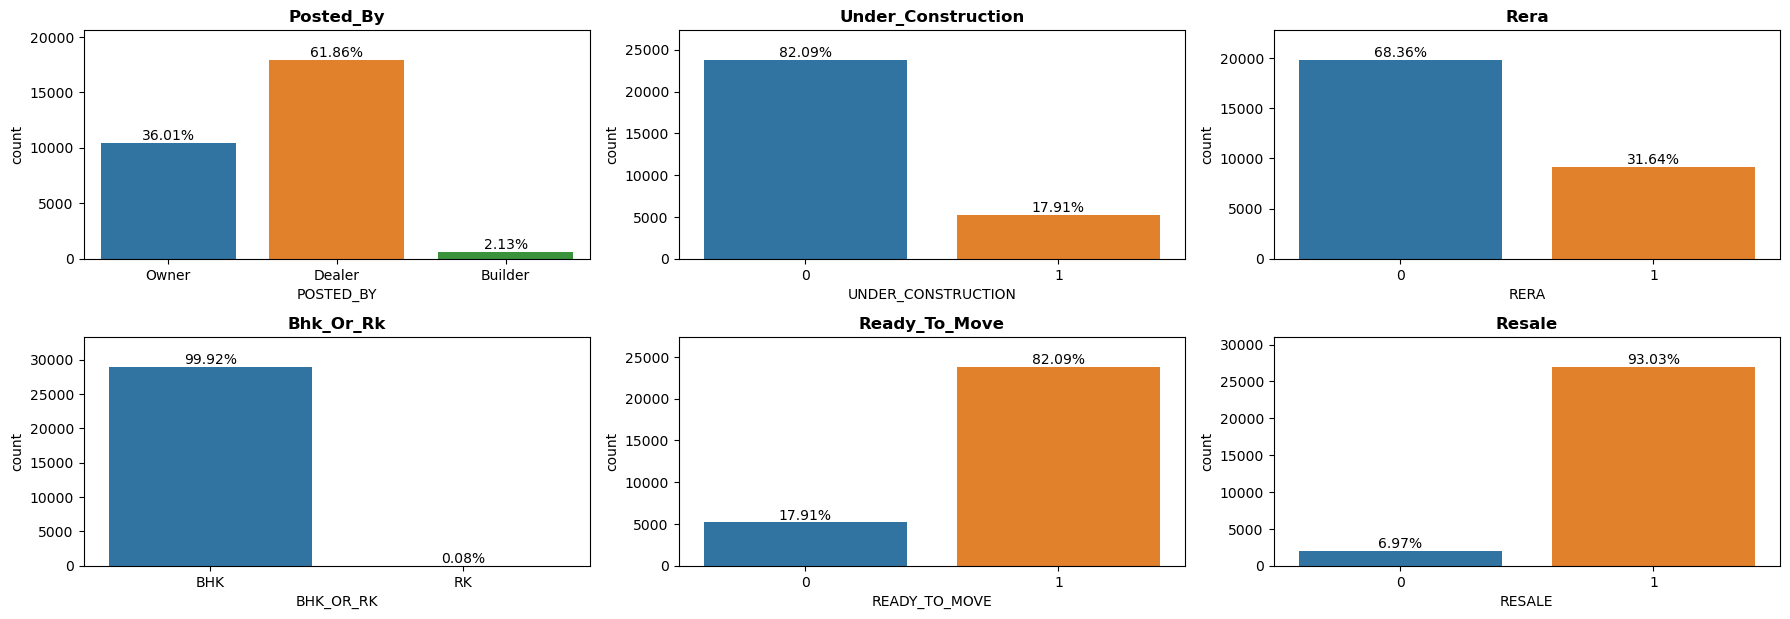

In [26]:
# Plotting the countplots for each variable in target_variables
plt.figure(figsize=(18,r*3))
for n,var in enumerate(target_variables):
    plot = plt.subplot(r,3,n+1)
    sns.countplot(x=df[var]).margins(y=0.15)
    plt.title(f'{var.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

# ML Model Implementation

In [22]:
from sklearn.preprocessing import LabelEncoder
le_posted_by = LabelEncoder()
le_bhk_or_rk = LabelEncoder()
le_city = LabelEncoder()

# Fit and transform each column
df['POSTED_BY'] = le_posted_by.fit_transform(df['POSTED_BY'])
df['BHK_OR_RK'] = le_bhk_or_rk.fit_transform(df['BHK_OR_RK'])
df['CITY'] = le_city.fit_transform(df['CITY'])

# Store the encoders in a dictionary
label_encoders = {
    'POSTED_BY': le_posted_by,
    'BHK_OR_RK': le_bhk_or_rk,
    'CITY': le_city
}


C:\Users\prasa\AppData\Local\Temp\ipykernel_37912\2397292066.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['POSTED_BY'] = le_posted_by.fit_transform(df['POSTED_BY'])
C:\Users\prasa\AppData\Local\Temp\ipykernel_37912\2397292066.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BHK_OR_RK'] = le_bhk_or_rk.fit_transform(df['BHK_OR_RK'])
C:\Users\prasa\AppData\Local\Temp\ipykernel_37912\2397292066.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [23]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,2,0,0,2,0,1300.236407,1,1,12.969910,77.597960,55.0,21
1,1,0,0,2,0,1275.000000,1,1,12.274538,76.644605,51.0,159
2,2,0,0,2,0,933.159722,1,1,12.778033,77.632191,43.0,21
3,2,0,1,2,0,929.921143,1,1,28.642300,77.344500,62.5,78
4,1,1,0,2,0,999.009247,0,1,22.592200,88.484911,60.5,134
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,2,0,0,3,0,2500.000000,1,1,27.140626,78.043277,45.0,1
29447,2,0,0,2,0,769.230769,1,1,39.945409,-86.150721,16.0,243
29448,1,0,0,2,0,1022.641509,1,1,26.928785,75.828002,27.1,105
29449,2,0,0,2,0,927.079009,1,1,12.900150,80.227910,67.0,49


In [24]:
X = df.drop('TARGET(PRICE_IN_LACS)', axis=1)
y = df['TARGET(PRICE_IN_LACS)']

In [25]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Initialize the model
xgb = XGBRegressor()

# Define cross-validation method
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
rmse_scores = -cross_val_score(xgb, X, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(xgb, X, y, cv=kf, scoring='r2')

# Calculate the average scores
avg_rmse = np.sqrt(rmse_scores).mean()
avg_r2 = r2_scores.mean()

# Print the results
print(f'Average RMSE: {avg_rmse:.2f}')
print(f'Average R² Score: {avg_r2:.2f}')

Average RMSE: 214.61
Average R² Score: 0.87


In [27]:
from lightgbm import LGBMRegressor

# Initialize the model
lgbm = LGBMRegressor()

# Define cross-validation method
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
rmse_scores = -cross_val_score(lgbm, X, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(lgbm, X, y, cv=kf, scoring='r2')

# Calculate the average scores
avg_rmse = np.sqrt(rmse_scores).mean()
avg_r2 = r2_scores.mean()

# Print the results
print(f'Average RMSE: {avg_rmse:.2f}')
print(f'Average R² Score: {avg_r2:.2f}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 23178, number of used features: 11
[LightGBM] [Info] Start training from score 143.407530
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 23178, number of used features: 11
[LightGBM] [Info] Start training from score 143.640576
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
# Initialize the model
gbr = GradientBoostingRegressor()

# Define cross-validation method
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
rmse_scores = -cross_val_score(gbr, X, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(gbr, X, y, cv=kf, scoring='r2')

# Calculate the average scores
avg_rmse = np.sqrt(rmse_scores).mean()
avg_r2 = r2_scores.mean()

# Print the results
print(f'Average RMSE: {avg_rmse:.2f}')
print(f'Average R² Score: {avg_r2:.2f}')

Average RMSE: 171.86
Average R² Score: 0.93


In [33]:
from sklearn.ensemble import RandomForestRegressor
#Initialize the model
rf = RandomForestRegressor()

# Define cross-validation method
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
rmse_scores = -cross_val_score(rf, X, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(rf, X, y, cv=kf, scoring='r2')

# Calculate the average scores
avg_rmse = np.sqrt(rmse_scores).mean()
avg_r2 = r2_scores.mean()

# Print the results
print(f'Average RMSE: {avg_rmse:.2f}')
print(f'Average R² Score: {avg_r2:.2f}')

Average RMSE: 180.51
Average R² Score: 0.92


In [39]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
# Apply MinMaxScaler to selected columns 
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

# Initialize the model
lasso = Lasso(alpha=1.0)

# Define cross-validation method
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
rmse_scores = -cross_val_score(lasso, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(lasso, X_scaled, y, cv=kf, scoring='r2')

# Calculate the average scores
avg_rmse = np.sqrt(rmse_scores).mean()
avg_r2 = r2_scores.mean()

# Print the results
print(f'Average RMSE: {avg_rmse:.2f}')
print(f'Average R² Score: {avg_r2:.2f}')

Average RMSE: 603.06
Average R² Score: 0.11


In [38]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
# Apply MinMaxScaler to selected columns 
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)
# Initialize the model
ridge = Ridge(alpha=1.0)

# Define cross-validation method
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
rmse_scores = -cross_val_score(ridge, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(ridge, X_scaled, y, cv=kf, scoring='r2')

# Calculate the average scores
avg_rmse = np.sqrt(rmse_scores).mean()
avg_r2 = r2_scores.mean()

# Print the results
print(f'Average RMSE: {avg_rmse:.2f}')
print(f'Average R² Score: {avg_r2:.2f}')


Average RMSE: 586.59
Average R² Score: 0.15


# Hyperparameter Tuning

We will do hyperparameter tuning with optuna for three best models to see is there any further imporvement in thier perfromance.

Gradient Boosting with hyperparameter tuning

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import optuna

# Define the objective function for optimization
def objective(trial, data=X, target=y):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=7)
    
    # Suggest hyperparameters for GradientBoostingRegressor
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    
    model = GradientBoostingRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        subsample=subsample,
        max_features=max_features,
        random_state=42
    )
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    
    return rmse

# Create the Optuna study and optimize
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Print the best trial results
print("Best trial:")
trial = study.best_trial
print(f"  RMSE: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")


[I 2024-06-09 20:20:05,068] A new study created in memory with name: no-name-d14a057f-2175-41ab-88f1-260770d7e966
C:\Users\prasa\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-09 20:20:15,884] Trial 0 finished with value: 254.2159069654675 and parameters: {'n_estimators': 298, 'learning_rate': 0.2586112992925414, 'max_depth': 7, 'min_samples_split': 18, 'min_samples_leaf': 10, 'subsample': 0.9719655417912045, 'max_features': 'log2'}. Best is trial 0 with value: 254.2159069654675.
C:\Users\prasa\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-09 20:20:29,840] Trial 1 fini

Best trial:
  RMSE: 132.9638103126147
  Params: 
    n_estimators: 374
    learning_rate: 0.11524407833752864
    max_depth: 9
    min_samples_split: 17
    min_samples_leaf: 7
    subsample: 0.9968807718112519
    max_features: None


RandomForest hyperparameter tuning with optuna

In [31]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# Define the objective function for optimization
def objective(trial, data=X, target=y):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=42)
    
    # Suggest hyperparameters for RandomForestRegressor
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 3, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    
    return rmse

# Create the Optuna study and optimize
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Print the best trial results
print("Best trial:")
trial = study.best_trial
print(f"  RMSE: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2024-06-12 22:09:27,586] A new study created in memory with name: no-name-c4f44b51-685b-4da6-8ae8-a8017ccb6cdd
C:\Users\prasa\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-12 22:10:14,929] Trial 0 finished with value: 286.34969045192923 and parameters: {'n_estimators': 440, 'max_depth': 22, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 0 with value: 286.34969045192923.
C:\Users\prasa\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-12 22:10:25,718] Trial 1 finished with value: 354.2157433450781 and parameters: {'n_estimators': 42

Best trial:
  RMSE: 140.2482009470877
  Params: 
    n_estimators: 436
    max_depth: 22
    min_samples_split: 2
    min_samples_leaf: 1
    max_features: None


XGBRegrssor hyperparameter tuning with optuna

In [34]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Define the objective function for optimization
def objective(trial, data=X, target=y):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=7)
    
    # Suggest hyperparameters for XGBRegressor
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 20)
    gamma = trial.suggest_float('gamma', 0, 5)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    reg_alpha = trial.suggest_float('reg_alpha', 0, 1)
    reg_lambda = trial.suggest_float('reg_lambda', 0, 1)
    
    model = XGBRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        gamma=gamma,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        random_state=42,
        objective='reg:squarederror'
    )
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    
    return rmse

# Create the Optuna study and optimize
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Print the best trial results
print("Best trial:")
trial = study.best_trial
print(f"  RMSE: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")


[I 2024-06-09 23:26:02,689] A new study created in memory with name: no-name-f496ceb8-205c-4971-8586-877f657caca4
C:\Users\prasa\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-06-09 23:26:05,546] Trial 0 finished with value: 283.5534396621729 and parameters: {'n_estimators': 447, 'learning_rate': 0.2794771061880132, 'max_depth': 7, 'min_child_weight': 14, 'gamma': 0.14001119439956633, 'subsample': 0.6312743167976578, 'colsample_bytree': 0.896340702112225, 'reg_alpha': 0.4385024141150259, 'reg_lambda': 0.6853755349795998}. Best is trial 0 with value: 283.5534396621729.
C:\Users\prasa\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the funct

Best trial:
  RMSE: 169.7354268157691
  Params: 
    n_estimators: 103
    learning_rate: 0.2995321048051205
    max_depth: 4
    min_child_weight: 2
    gamma: 3.0202263448203577
    subsample: 0.7504856502037356
    colsample_bytree: 0.8303210827249726
    reg_alpha: 0.5243201242650083
    reg_lambda: 0.056423003485316044


In [27]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Define the hyperparameters
params = {
    'n_estimators': 374,
    'learning_rate': 0.11524407833752864,
    'max_depth': 9,
    'min_samples_split': 17,
    'min_samples_leaf': 7,
    'subsample': 0.9968807718112519,
    'max_features': None
}

# Initialize the model with the specified hyperparameters
gbr = GradientBoostingRegressor(**params)

# Define cross-validation method
kf = KFold(n_splits=5, shuffle=True, random_state=7)

# Perform cross-validation for RMSE
rmse_scores = -cross_val_score(gbr, X, y, cv=kf, scoring='neg_mean_squared_error')
avg_rmse = np.sqrt(rmse_scores).mean()

# Perform cross-validation for R² Score
r2_scores = cross_val_score(gbr, X, y, cv=kf, scoring='r2')
avg_r2 = r2_scores.mean()

# Print the results
print(f'Average RMSE: {avg_rmse:.2f}')
print(f'Average R² Score: {avg_r2:.2f}')


Average RMSE: 154.06
Average R² Score: 0.95


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Define the hyperparameters
params = {
    'n_estimators': 436,
    'max_depth': 22,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': None
}

# Initialize the model with the specified hyperparameters
rfr = RandomForestRegressor(**params)

# Define cross-validation method
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for RMSE
rmse_scores = -cross_val_score(rfr, X, y, cv=kf, scoring='neg_mean_squared_error')
avg_rmse = np.sqrt(rmse_scores).mean()

# Perform cross-validation for R² Score
r2_scores = cross_val_score(rfr, X, y, cv=kf, scoring='r2')
avg_r2 = r2_scores.mean()

# Print the results
print(f'Average RMSE: {avg_rmse:.2f}')
print(f'Average R² Score: {avg_r2:.2f}')


Average RMSE: 179.79
Average R² Score: 0.92


In [43]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Define the hyperparameters
params = {
    'n_estimators': 103,
    'learning_rate': 0.2995321048051205,
    'max_depth': 4,
    'min_child_weight': 2,
    'gamma': 3.0202263448203577,
    'subsample': 0.7504856502037356,
    'colsample_bytree': 0.8303210827249726,
    'reg_alpha': 0.5243201242650083,
    'reg_lambda': 0.056423003485316044
}

# Initialize the model with the specified hyperparameters
xgbr = XGBRegressor(**params, objective='reg:squarederror')

# Define cross-validation method
kf = KFold(n_splits=5, shuffle=True, random_state=7)

# Perform cross-validation for RMSE
rmse_scores = -cross_val_score(xgbr, X, y, cv=kf, scoring='neg_mean_squared_error')
avg_rmse = np.sqrt(rmse_scores).mean()

# Perform cross-validation for R² Score
r2_scores = cross_val_score(xgbr, X, y, cv=kf, scoring='r2')
avg_r2 = r2_scores.mean()

# Print the results
print(f'Average RMSE: {avg_rmse:.2f}')
print(f'Average R² Score: {avg_r2:.2f}')


Average RMSE: 176.22
Average R² Score: 0.92


In [28]:
import pickle
with open('label_house_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

In [29]:
import pickle

# Fitting the model on the entire dataset
gbr.fit(X, y)

# Saving the model to a file
with open('gbr_house_model.pkl', 'wb') as f:
    pickle.dump(gbr, f)